In [7]:
from glob import glob
import os

model_result_paths = glob("./data/judgements/*/*/*.json")

In [9]:
import pandas as pd

all_result_dfs = []

for model_result_path in model_result_paths:
    temp_df = pd.read_json(model_result_path, lines=True)
    temp_df["judge_model"] = model_result_path.split("/")[3]
    temp_df["eval_dataset"] = model_result_path.split("/")[4]
    temp_df["model_name"] = model_result_path.split("/")[5].replace(".json", "")
    
    all_result_dfs.append(temp_df)

In [56]:
import pandas as pd

all_result_df = pd.concat(all_result_dfs)

all_result_df["dataset_category"] = all_result_df["eval_dataset"] + " " + all_result_df["Category"]

In [92]:
all_result_df.groupby(
    ["model_name", "eval_dataset"]
).score.mean().reset_index(drop=False).pivot_table(values="score", index="model_name", columns="eval_dataset")

eval_dataset,elyza__ELYZA-tasks-100,lightblue__tengu_bench
model_name,,
gpt-3.5-turbo-0125,3.62,6.816667
gpt-4-turbo-preview,4.47,7.841667


In [89]:
mean_df = all_result_df.groupby(
    ["model_name", "Category"]
).score.mean().reset_index(level=1, drop=False)

In [87]:
unique_models = mean_df.index.unique()

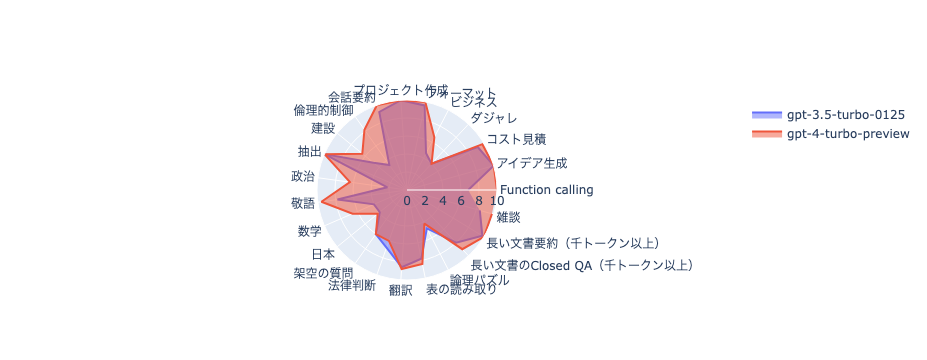

In [88]:
import plotly.graph_objects as go

fig = go.Figure()

for unique_model in unique_models:
    
    model_mean_df = mean_df.loc[unique_model]
    
    fig.add_trace(go.Scatterpolar(
          r=model_mean_df["score"],
          theta=model_mean_df["Category"],
          fill='toself',
          name=unique_model
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# number of variable
categories=list(df)[1:]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()


KeyError: 0

In [38]:
values

NameError: name 'values' is not defined